In [0]:
# We are about to make dumbest possible neural net. It will contain 1 neuron and no bias.
# We will be optimizing grayscale pixel
# Basically, this is more visual example for the simplest possible neural network from the book "grokking deep learning"

In [0]:
import numpy as np
from PIL import Image

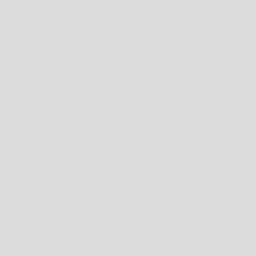

In [3]:
# this is the target pixel. it is light gray
target_pix = np.array([[220]])

# let's visualize it. 
def show(im):
  return Image.fromarray(im.astype('uint8')).resize((256, 256))
  

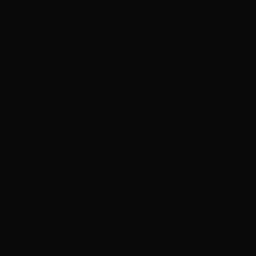

In [4]:
# this is the input pixel, almost black

input_pix = np.array([[10,]])

show(input_pix)

Prediction: [[5.95032651]], Error: 45817.26272043104


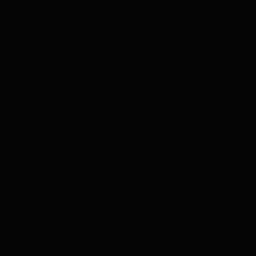

In [5]:
# let's make initial prediction. 
w_init = np.random.random()
pred = input_pix * w_init
err = ((pred - target_pix) ** 2).sum()  # square the error, so it's always positive
print("Prediction: {}, Error: {}".format(pred, err))

# it's more black that the original! Bad!
show(pred)

In [6]:
# we'll be using hot-cold method 
# change weight a little, up and down, and see which way reduces error

def learn_step(w, inp, goal, learning_rate=0.1):
    lr = learning_rate
    def get_err(w):
        return ((inp * w - goal) ** 2).sum()
    
    err = get_err(w)
    err_up = get_err(w + lr)
    err_down = get_err(w - lr)
    
    if err_up < err_down:
        w = w + lr
        err = err_up
    
    else: 
      w = w - lr
      err = err_down

    return w, inp * w, err


# let's learn! if everything is OK, error should decrease.
preds = []
w, pred, err = learn_step(w_init, input_pix, target_pix)
for i in range(220):
    w, pred, err = learn_step(w, input_pix, target_pix)
    preds.append(pred)
    print("Iteration {}. Weight: {}, Prediction: {}, Error: {}".format(i, w, pred, err))


Iteration 0. Weight: 0.7950326511739242, Prediction: [[7.95032651]], Error: 44965.064026478
Iteration 1. Weight: 0.8950326511739242, Prediction: [[8.95032651]], Error: 44541.96467950148
Iteration 2. Weight: 0.9950326511739241, Prediction: [[9.95032651]], Error: 44120.865332524954
Iteration 3. Weight: 1.0950326511739241, Prediction: [[10.95032651]], Error: 43701.76598554844
Iteration 4. Weight: 1.1950326511739242, Prediction: [[11.95032651]], Error: 43284.666638571915
Iteration 5. Weight: 1.2950326511739243, Prediction: [[12.95032651]], Error: 42869.56729159539
Iteration 6. Weight: 1.3950326511739244, Prediction: [[13.95032651]], Error: 42456.467944618875
Iteration 7. Weight: 1.4950326511739245, Prediction: [[14.95032651]], Error: 42045.36859764235
Iteration 8. Weight: 1.5950326511739246, Prediction: [[15.95032651]], Error: 41636.26925066583
Iteration 9. Weight: 1.6950326511739247, Prediction: [[16.95032651]], Error: 41229.169903689304
Iteration 10. Weight: 1.7950326511739247, Predictio

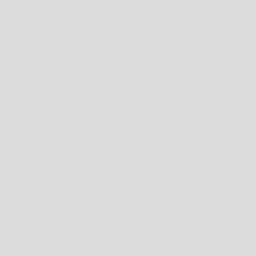

In [7]:
# let's look at our learned pixel:
show(pred)  # not bad!

In [20]:
# thats all folks!
from IPython.display import HTML

HTML("""<img src="https://i.imgur.com/tY3GksS.gif">
""")